In [1]:
import os
from glob import glob
from scipy.io import loadmat # h5py returns error when loading .mat files coverted from .cxd files
import numpy as np
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
from pywavesurfer import ws
from WC_ephys import *
from skimage.io import imsave
import matplotlib.pyplot as plt


In [2]:
# dataPath = '/Users/zhengj10/Desktop/201021/cell_4'
dataPath = '/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4'
os.path.exists(dataPath)


True

In [470]:
metaFiles = glob(dataPath+'/*meta.mat')
# os.mkdir(dataPath+'/meta')
# import shutil
# for metaFile in metaFiles:
#     shutil.move(metaFile,dataPath+'/meta')



In [3]:
matFiles = glob(dataPath+'/*.mat')
matFiles = sorted(matFiles)
h5Files = glob(dataPath+'/*.h5')
h5Files = sorted(h5Files)
print('*.mat files: %d' %len(matFiles))
print('*.h5 files: %d' %len(h5Files))


*.mat files: 9
*.h5 files: 9


In [4]:
data = loadmat(matFiles[0])

In [6]:
# data = loadmat(matFile)
imgData = data['data']

In [11]:
imgData[:,0][0].shape

(16, 512)

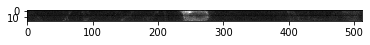

In [14]:
plt.imshow(imgData[:,0][0],cmap='gray')

In [472]:
F_all_trials = []
for matFile in matFiles:
    if matFile == '/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201027/cell_1/trial00007.mat':
        continue
    print(matFile)
    
    data = loadmat(matFile)
    imgData = data['data']
    F = []
    for frame in range(imgData[:,0].shape[0]):
        F.append(np.mean(imgData[:,0][frame][:,240:272]))
    F_all_trials.append(F)


/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial00004.mat
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial00006.mat
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial00007.mat
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial00008.mat
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial00011.mat
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial00013.mat
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial00014.mat
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial00015.mat
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial00016.mat


In [473]:
import h5py
VSYNC_signal_all_trials = []
for h5File in h5Files:
    if h5File == '/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201027/cell_1/trial_0007.h5':
        continue
    print(h5File)
    data = h5py.File(h5File,'r')
    keys = []
    for k in data.keys():
#         print(k)
        keys.append(k)
    VSYNC_signal = data[keys[1]]['digitalScans'][()][0]
    VSYNC_signal_all_trials.append(VSYNC_signal)


/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial_0004.h5
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial_0006.h5
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial_0007.h5
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial_0008.h5
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial_0011.h5
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial_0013.h5
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial_0014.h5
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial_0015.h5
/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201028/cell_4/trial_0016.h5


In [474]:
for i in range(len(F_all_trials)):
    print(len(F_all_trials[i]))

6400
6400
6400
6400
6400
6400
6400
6400
6400


In [475]:
F_all_trials_mean = np.mean(F_all_trials,axis=0)

In [476]:
len(F_all_trials_mean)

6400

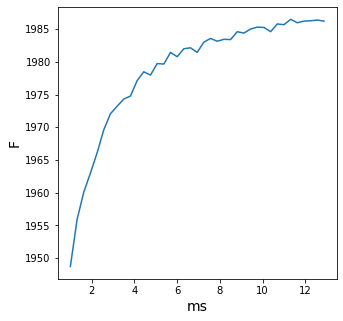

In [477]:
fig = plt.figure(figsize=[5,5])
# plt.plot(F_all_trials_mean[1595:1610])
x = np.linspace(0,2000,6400)
plt.plot(x[4810:4849]-x[4810]+1,F_all_trials_mean[4810:4849])
# plt.plot(x[100:-100],F_all_trials_mean[100:-100])
# plt.plot(x[1602:1640]-x[1602]+1,F_all_trials_mean[1602:1640])
plt.ylabel('F',size=14)
plt.xlabel('ms',size=14)
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201021/Voltron-ST_trace.png',dpi=1200)

plt.show()


In [478]:
def func(x, a, b, c, d, e):
        # x = x.astype(np.float128)
        # a = a.astype(np.float128)
        # b = b.astype(np.float128)
        # c = c.astype(np.float128)
    y = -a * np.exp(-b * x) + -c * np.exp(-d * x) + e
        # y = y.astype(np.float128)
    return y


In [479]:
x1 = x[4810:4849]-x[4810]
trace_to_fit = F_all_trials_mean[4810:4849]-1945

# x1 = x[1602:1640]-x[1602]
# trace_to_fit = F_all_trials_mean[1602:1640]-1938


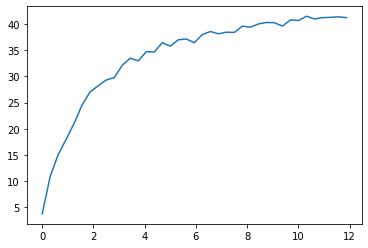

In [480]:
plt.plot(x1,trace_to_fit)

In [481]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x1, trace_to_fit,maxfev=5000)

/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


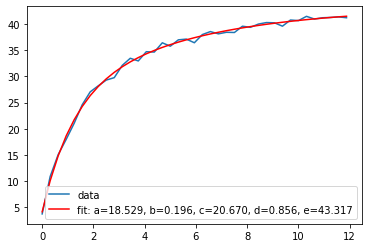

In [482]:
fig = plt.figure()
plt.plot(x1, trace_to_fit, label='data')
plt.plot(x1, func(x1, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))
# plt.plot(x1, func(x1, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201021/act_kinetics.png',dpi=1200)
plt.show()


In [483]:
tau_f = 1/popt[1]
tau_s = 1/popt[3]

In [484]:
tau_f

5.100432936049969

In [485]:
tau_s

1.1682701469506789

In [486]:
percent = 1 - tuple(popt)[0]/(tuple(popt)[0]+tuple(popt)[2])
percent

0.5273165624344395

In [487]:
tau_f_deact_all.append(tau_s)
tau_s_deact_all.append(tau_f)
tau_f_deact_percent.append(percent)

In [488]:
tau_f_deact_all

[1.1611704630648265,
 1.2614343057655686,
 1.2421170109570623,
 0.8450815312005702,
 0.7008548028601057,
 0.8594251748355868,
 0.8339700402202587,
 1.1682701469506789]

In [489]:
tau_s_deact_all

[11.063580608849467,
 4.7248297507484756,
 5.448495340881275,
 3.8470280626964155,
 5.588473012325986,
 3.929485503222365,
 4.341270397937108,
 5.100432936049969]

In [490]:
tau_f_deact_percent

[0.587016615385593,
 0.6055630067373314,
 0.7306666041679435,
 0.5443790059529591,
 0.4371808929573374,
 0.42255800002076244,
 0.39763143102799525,
 0.5273165624344395]

In [177]:
import pandas as pd

In [531]:
df = pd.DataFrame({
    'Date':['201027','201027','201027','201027','201028','201028','201028','201028'],
    'Cell':['Cell_1','Cell_1','Cell_1','Cell_1','Cell_2','Cell_2','Cell_2','Cell_2'],
    'Sensor':['Voltron','Voltron','Voltron','Voltron','Voltron 2','Voltron 2','Voltron 2','Voltron 2'],
    'tau_f_act':tau_f_act_all,
    'tau_s_act':tau_s_act_all,
    'tau_f_act_percent':tau_f_act_percent,
    'tau_f_deact':tau_f_deact_all,
    'tau_s_deact':tau_s_deact_all,
    'tau_f_deact_percent':tau_f_deact_percent
})

In [533]:
df.to_pickle('/Users/zhengj10/Desktop/v4/kinetics.pkl')

In [534]:
df.columns

Index(['Date', 'Cell', 'Sensor', 'tau_f_act', 'tau_s_act', 'tau_f_act_percent',
       'tau_f_deact', 'tau_s_deact', 'tau_f_deact_percent'],
      dtype='object')

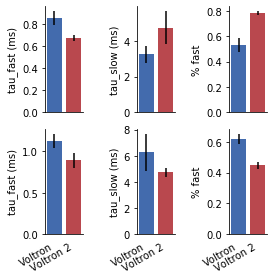

In [545]:
fig = plt.figure(figsize=(4,4))

params = ['tau_f_act','tau_s_act','tau_f_act_percent','tau_f_deact','tau_s_deact','tau_f_deact_percent']
y_labels = ['tau_fast (ms)','tau_slow (ms)','% fast','tau_fast (ms)','tau_slow (ms)','% fast']

sensors = df.Sensor.unique()
for f in range(len(params)):
    ax = plt.subplot(2,3,f+1)
    mean_all = []
    sem_all = []
    labels = []
    for sensor in sensors:
#         if sensor == 'N4':
#             continue
        df_sensor = df[df.Sensor == sensor]
        param_mean = np.nanmean(df_sensor[params[f]].tolist(), axis=0)
        param_sem = np.nanstd(df_sensor[params[f]].tolist(), axis=0)/np.sqrt(len(df_sensor))
        mean_all.append(param_mean)
        sem_all.append(param_sem)
        labels.append(sensor)

    

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    y_pos = np.arange(1, len(sensors)+1)
    if f>2:
#         plt.xticks(y_pos, sensors, rotation=45, ha = 'right')
        plt.xticks(y_pos, labels, rotation=30, ha = 'right')
    
    else:
        plt.xticks(y_pos, [], rotation=30, ha = 'right')

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True)


    ax.set_ylabel(y_labels[f])
    barlist = ax.bar(y_pos, mean_all, yerr = sem_all,color = ['xkcd:french blue', 'xkcd:dusty red'])
#     barlist[0].set_color('m')
#     barlist[1].set_color('c')
    # barlist[2].set_color('m')
    # barlist[3].set_color('c')
    # barlist[4].set_color('g')
    # barlist[5].set_color('r')
    # barlist[6].set_color('b')
    # barlist[7].set_color('brown')
    # plt.rcParams["axes.labelweight"] = "bold"
    # if params[f] in['tau_off_s_double']:
      #  ax.set_ylim([0,1200])
# plt.xticks(y_pos, labels, rotation=30, ha = 'right')
plt.tight_layout()
fig.savefig('/Users/zhengj10/Desktop/v4/kinetics.png',dpi=1200)
plt.show()


In [154]:
popt

array([15.05228092,  0.4560425 ,  8.15839754,  1.44909926,  3.37045938])

In [22]:
metaFile = '/Users/zhengj10/Desktop/201021/cell_4/meta/trial00030_meta.mat'


In [27]:
meta = loadmat(metaFile)

In [29]:
meta['meta']

array([[array(['Global Field 4202 Capture_Depth'], dtype='<U31'),
        array([[16]], dtype=uint8)],
       [array(['Global Field 540 Image_Height'], dtype='<U29'),
        array([[16]], dtype=uint8)],
       [array(['Global Field 2975 Time_From_Last'], dtype='<U32'),
        array([[0.000304]])],
       ...,
       [array(['Global Field 3409 i_Image1 Image_Temperature'], dtype='<U44'),
        array([[-9]], dtype=int16)],
       [array(['Global Field 1449 i_Image1 Image_Temperature'], dtype='<U44'),
        array([[-9]], dtype=int16)],
       [array(['Global Field 1281 Capture_Depth'], dtype='<U31'),
        array([[16]], dtype=uint8)]], dtype=object)

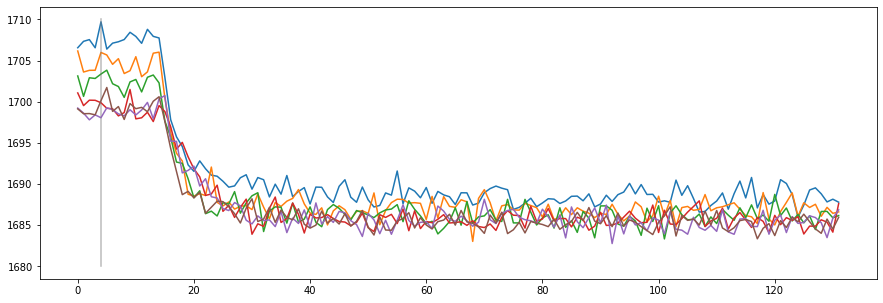

In [34]:
fig = plt.figure(figsize=[15,5])
for i in range(len(F_all_trials)):
    plt.plot(F_all_trials[i][1588:1720])
    plt.plot([4,4],[1680,1710],color='gray',alpha=0.1)
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201014/trace_3200Hz.png',dpi=1200)

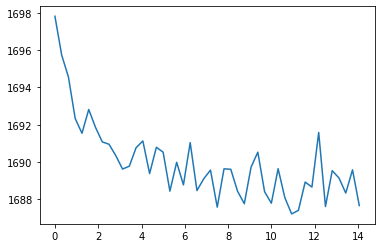

In [35]:
x = np.linspace(0,1999,6400)
x1 = x[1604:1650]-x[1604]
plt.plot(x1,F_all_trials[0][1604:1650])

### Check VSYNC signal (variation in peak timing)

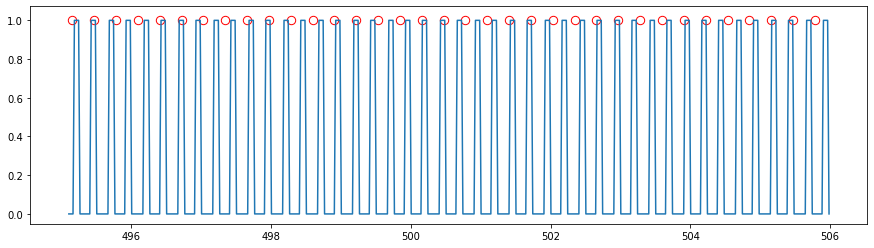

In [36]:
plt.figure(figsize=[15,4])
x1 = np.linspace(0,2000,100000)
x2 = np.linspace(0,2000,6399)
# plt.figure(figsize=[5,10])
# for i in range(len(VSYNC_signal_all_trials)):
ax = plt.subplot(1,1,1)
ax.plot(x1[24755:25300],VSYNC_signal_all_trials[i][24755:25300])
a = x2[1584:1619]
ax.scatter(a,np.ones(np.shape(a)),edgecolor='r',color='w',facecolor=None,s=70)
plt.show()


In [ ]:
# imsave('/Users/zhengj10/Desktop/a.tif', imgSeq.astype('float32'))

In [ ]:
df

In [ ]:
data_timing = {}
columns = ['Frame_no','Time_From_Last','Frame_timing']
for column in columns:
    data_timing[column] = []

frame_no=0
for i,r in df.iterrows():
    if 'Time_From_Last' in r['Param']:
        data_timing['Time_From_Last'].append(r['Value'])
        if frame_no==0:
            data_timing['Frame_timing'].append(r['Value'])
        else:
            data_timing['Frame_timing'].append(data_timing['Frame_timing'][-1]+r['Value'])
        frame_no+=1
        data_timing['Frame_no'].append(frame_no)
        

In [39]:
import pandas as pd

In [40]:
df_timing = pd.DataFrame(data_timing)

NameError: name 'data_timing' is not defined

In [ ]:
len(df_timing)

In [ ]:
df_timing

### Compare VSYNC signal and frame timing info in meta data

NameError: name 'df_timing' is not defined

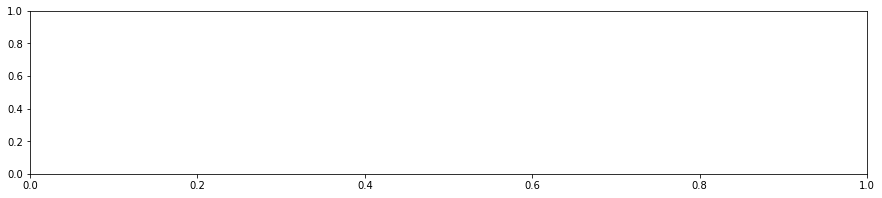

In [37]:
fig = plt.figure(figsize=[15,3])
ax = plt.subplot(111)
# x = df_timing.Frame_timing.to_list()[1595:1631]
x = df_timing.Frame_timing.to_list()[6000:6036]
x = np.array(x)*1000
# x2 = np.linspace(0,2000,100000)[24890:25460]
# y2 = VSYNC_signal_all_trials[0][24890:25460]

x2 = np.linspace(0,2000,100000)[93460:94130]
y2 = VSYNC_signal_all_trials[0][93460:94130]

ax.scatter(x,np.ones(x.shape[0]),color='r')
ax.plot(x2,y2)
ax.set_xlabel('ms',size=13)
# fig.savefig('/Users/zhengj10/Desktop/frame_timing_vs_VSYNC_signal.png',dpi=1200)
plt.show()


In [41]:
VSYNC_signal_all_trials[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

#### Get peak index from VSYNC signals

In [42]:
def get_peak_idx(trace,samples_per_ms = 40.0):
    peak_indices = np.where(trace==1) # All indices with value equal to 1 (high)
    peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
    # Note the first peak was counted in different way: it's counted because it's subtracting the last value
    # in the list and the result is not equal to 1.
    peak_index = peak_indices[0][peak_index]
    # peak_indices[0]: remove tuple format
    peak_index = peak_index/samples_per_ms
    return peak_index


In [62]:
peak_indices = np.where(VSYNC_signal_all_trials[0]==1)
peak_indices[0].shape

(25600,)

In [63]:
peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]

In [59]:
VSYNC_signal_all_trials[0].shape[0]

80000

array([   13,    26,    38, ..., 79801, 79813, 79825])

In [74]:
peak_index = get_peak_idx(VSYNC_signal_all_trials[1])
len(peak_index)

6400

In [76]:
peak_index/40.0

array([3.250000e-01, 6.500000e-01, 9.500000e-01, ..., 1.995025e+03,
       1.995325e+03, 1.995625e+03])

In [80]:
peak_index[1603]/40.0

500.175

In [46]:
peak_index = peak_index/50.0 # unit in ms

In [ ]:
x = np.array(df_timing.Frame_timing.to_list())*1000
peak_index-x

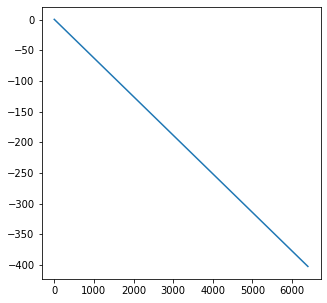

In [47]:
fig = plt.figure(figsize=[5,5])
plt.plot(peak_index-x)
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201014/diff_timing.png',dpi=1200)
plt.show()


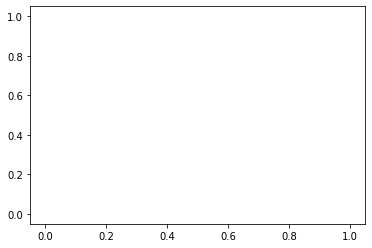

In [48]:
plt.plot(VSYNC_signal_all_trials[0][99781:99800])

In [49]:
i=1604
peak_index[i]-x[i]

-100.69766838568529

In [50]:
i=1602
peak_index[i]

399.88

In [51]:
x[i]

500.4528832630099